In [12]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline

In [13]:
df = pd.read_csv('data_evaluacion_Limpio.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [14]:
X = df.drop(columns=['salary'], axis=1)
y = df['salary']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [16]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [17]:
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [18]:
y_pred = model.predict(X_test)

In [19]:
# Mostramos el reporte de clasificación y la precisión del modelo
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      6803
           1       0.77      0.56      0.65      2242

    accuracy                           0.85      9045
   macro avg       0.82      0.75      0.78      9045
weighted avg       0.84      0.85      0.84      9045

Accuracy: 0.8488667772249862


In [20]:
# Evaluacion del modelo
print('Train Accuracy :', (model.score(X_train, y_train))*100,"%")
print('Test Accuracy :', (model.score(X_test, y_test))*100,"%")
print("Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy : 85.27517483483982 %
Test Accuracy : 84.88667772249862 %
Accuracy: 0.8488667772249862


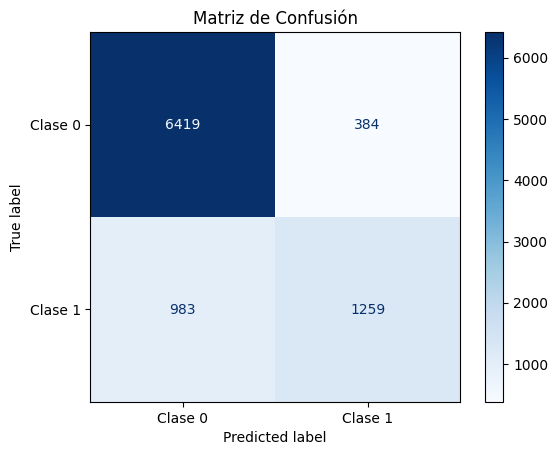

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Clase 0', 'Clase 1'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


In [22]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']